In [14]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)         # show all columns
pd.set_option('display.expand_frame_repr', False)  # disable wrapping


In [15]:
df = pd.read_csv('train.csv')
print(df.head())


   PassengerId  Survived  Pclass                                               Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                            Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                             Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                           Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


In [16]:
df = df.drop(columns=['PassengerId','Cabin', 'Embarked', 'Ticket', 'Name']) # drop unnecessary columns
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
# df['Age'] = df['Age'].fillna(df['Age'].mean()) # fill missing values with mean
# df['Age'] = df['Age'].fillna(df['Age'].median()) # fill missing values with median
# df['Age'] = df['Age'].fillna(df['Age'].mode()[0]) # fill missing values with mode
# df['Age'] = df['Age'].fillna(df['Age'].interpolate()) # fill missing values with interpolation
# df['Age'] = df['Age'].fillna(df['Age'].bfill()) # fill missing values with backfill
# df['Age'] = df['Age'].fillna(df['Age'].ffill()) # fill missing values with forward fill
# df['Age'] = df['Age'].fillna(df['Age'].min()) # fill missing values with min
# df['Age'] = df['Age'].fillna(df['Age'].max()) # fill missing values with max
# df['Age'] = df['Age'].fillna(df['Age'].std()) # fill missing values with std
# df['Age'] = df['Age'].fillna(df['Age'].var()) # fill missing values with variance
# df['Age'] = df['Age'].fillna(df['Age'].skew()) # fill missing values with skew
# df['Age'] = df['Age'].fillna(df['Age'].kurt()) # fill missing values with kurtosis
# df['Age'] = df['Age'].fillna(df['Age'].quantile(0.5)) # fill missing values with quantile
# df['Age'] = df['Age'].fillna(df['Age'].quantile(0.25)) # fill missing values with quantile
# df['Age'] = df['Age'].fillna(df['Age'].quantile(0.75)) # fill missing values with quantile
# print(df.head())

In [17]:
# Fill missing Age values with the median age grouped by Pclass and Sex
df['Age'] = df['Age'].fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [18]:
df ['Sex'] = df['Sex'].map({'male': 0 , 'female': 1})
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [19]:
print(df.describe())

         Survived      Pclass         Sex         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642    0.352413   29.112424    0.523008    0.381594   32.204208
std      0.486592    0.836071    0.477990   13.304424    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000    0.000000   21.500000    0.000000    0.000000    7.910400
50%      0.000000    3.000000    0.000000   26.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000    1.000000   36.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000  512.329200


In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB
None


In [24]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


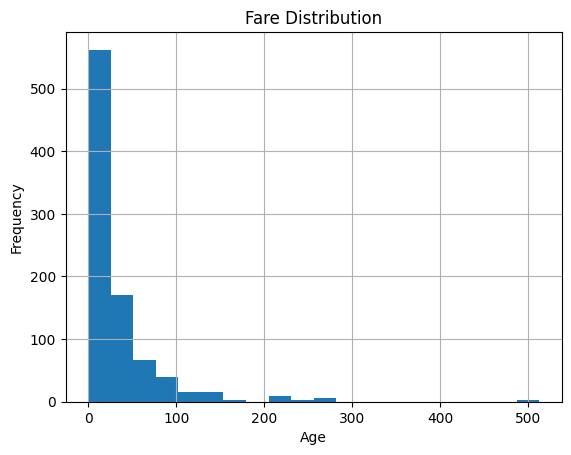

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for 'Fare'
df['Fare'].hist(bins=20)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

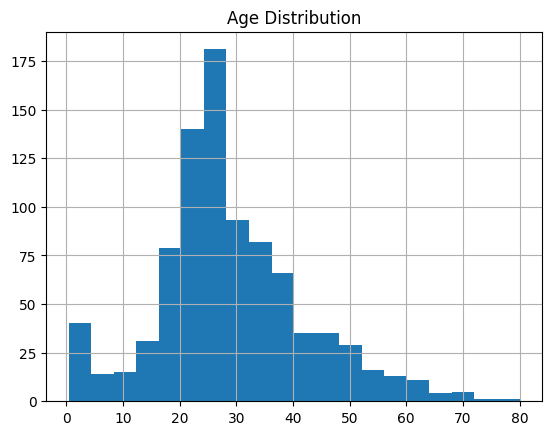

In [21]:
import matplotlib.pyplot as plt
df['Age'].hist(bins=20) 
plt.title('Age Distribution')
plt.show()

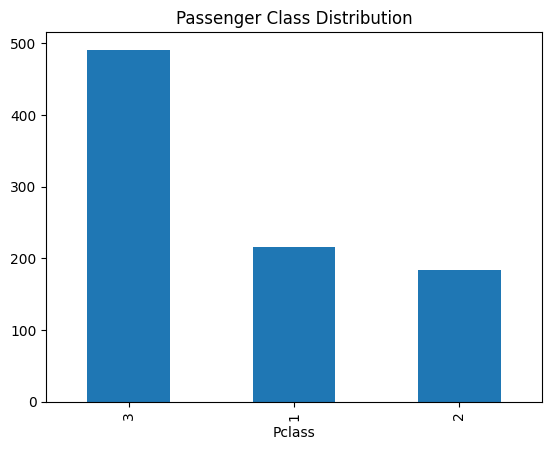

In [22]:
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Passenger Class Distribution')
plt.show()

In [23]:
print(df.groupby('Sex')['Survived'].mean())
print(df.groupby('Pclass')['Survived'].mean())

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='Survived'>

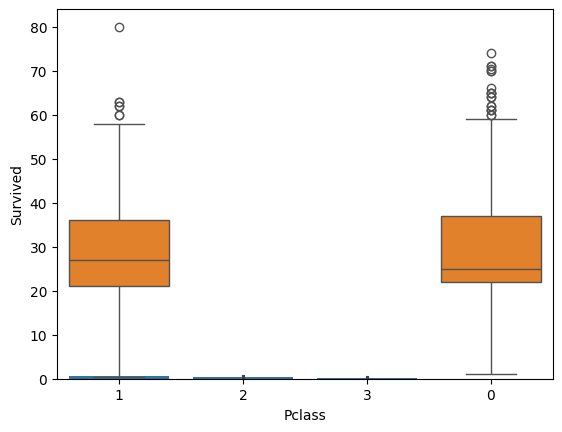

In [29]:
import seaborn as sns
sns.barplot(x='Pclass', y='Survived', data=df)
sns.boxplot(x='Survived', y='Age', data=df)

In [30]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone
0         0       3    0  22.0      1      0   7.2500           2        0
1         1       1    1  38.0      1      0  71.2833           2        0
2         1       3    1  26.0      0      0   7.9250           1        1
3         1       1    1  35.0      1      0  53.1000           2        0
4         0       3    0  35.0      0      0   8.0500           1        1


In [31]:
df = df.drop(columns=['SibSp', 'Parch']) # drop since they are not needed anymore
print(df.head())

   Survived  Pclass  Sex   Age     Fare  FamilySize  IsAlone
0         0       3    0  22.0   7.2500           2        0
1         1       1    1  38.0  71.2833           2        0
2         1       3    1  26.0   7.9250           1        1
3         1       1    1  35.0  53.1000           2        0
4         0       3    0  35.0   8.0500           1        1


In [32]:
print(df.groupby('IsAlone')['Survived'].mean())
print(df.groupby('FamilySize')['Survived'].mean())

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(df.head())

   Survived  Pclass  Sex       Age      Fare  FamilySize  IsAlone
0         0       3    0 -0.534891 -0.502445           2        0
1         1       1    1  0.668392  0.786845           2        0
2         1       3    1 -0.234070 -0.488854           1        1
3         1       1    1  0.442776  0.420730           2        0
4         0       3    0  0.442776 -0.486337           1        1


Survived      1.000000
Sex           0.543351
Fare          0.257307
FamilySize    0.016639
Age          -0.059579
IsAlone      -0.203367
Pclass       -0.338481
Name: Survived, dtype: float64
Axes(0.125,0.11;0.775x0.77)


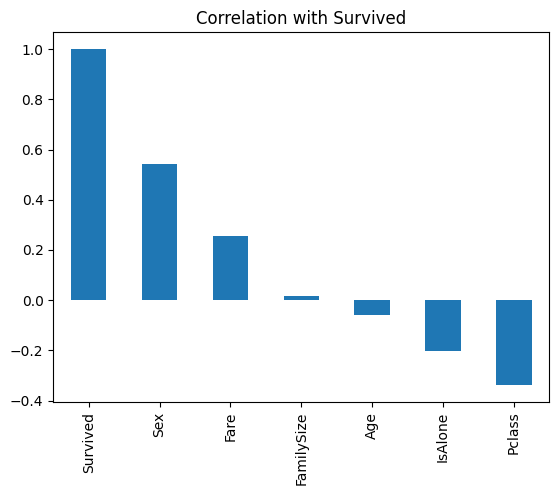

In [ ]:
print(df.corr()['Survived'].sort_values(ascending=False)) # correlation matrix
print(df.corr()['Survived'].sort_values(ascending=False).plot(kind='bar')) # correlation matrix plot
plt.title('Correlation with Survived')
plt.show()

In [39]:
df = df.drop(columns=['Age', 'FamilySize']) # drop since they are not needed anymore
print(df.head())

   Survived  Pclass  Sex      Fare  IsAlone
0         0       3    0 -0.502445        0
1         1       1    1  0.786845        0
2         1       3    1 -0.488854        1
3         1       1    1  0.420730        0
4         0       3    0 -0.486337        1


In [40]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to understand the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 4)
X_test shape: (179, 4)
y_train shape: (712,)
y_test shape: (179,)


In [41]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

     Pclass  Sex      Fare  IsAlone
331       1    0 -0.074583        1
733       2    0 -0.386671        1
382       3    0 -0.488854        1
704       3    0 -0.490280        0
813       3    1 -0.018709        0
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7821229050279329
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Confusion Matrix
[[88 17]
 [22 52]]


In [45]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

   Feature  Coefficient
1      Sex     2.490380
2     Fare     0.082416
3  IsAlone    -0.033713
0   Pclass    -0.830308


In [62]:
# df = df.drop(columns=['IsAlone']) # drop since they are not needed anymore
print(df.head())

   Survived  Pclass  Sex      Fare
0         0       3    0 -0.502445
1         1       1    1  0.786845
2         1       3    1 -0.488854
3         1       1    1  0.420730
4         0       3    0 -0.486337


In [66]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']  # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())

     Pclass  Sex      Fare
331       1    0 -0.074583
733       2    0 -0.386671
382       3    0 -0.488854
704       3    0 -0.490280
813       3    1 -0.018709
331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64


In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

In [68]:
# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix:
[[91 14]
 [19 55]]


In [69]:
# Feature importance
import pandas as pd
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
  Feature  Importance
2    Fare    0.544203
1     Sex    0.344543
0  Pclass    0.111254


In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())

Cross-Validation Accuracy: 0.7822547234950725


In [71]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')

# To load the model later
# loaded_model = joblib.load('random_forest_model.pkl')

['random_forest_model.pkl']

In [77]:
df_test = pd.read_csv('test.csv')
print(df_test.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [78]:
df_test_processed = df_test[['PassengerId', 'Pclass', 'Sex', 'Fare']]

In [79]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],  # Ensure this column exists
    'Survived': new_predictions
})

# Save the submission file as a CSV
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")

Submission file created: submission.csv
